# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Set the API key (replace 'your_api_key' with your actual API key)# MY Statement Added.
api_key = weather_api_key# MY CODE ADDED

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={api_key}&units=metric"  # Use units=metric for Celsius
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make an API request using requests.get()
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City {city} not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | crane
Processing Record 5 of Set 1 | arandelovac
City arandelovac not found. Skipping...
'coord'
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | altai
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | byron bay
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | igarka
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | devinuwara
City devinuwara not found. Skipping...
'coord'
Processing Record 14 of Set 1 | outapi
City outapi not found. Skipping...
'coord'
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | san antonio de pale
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Se

In [ ]:
# # Set the API base URL
# url = # YOUR CODE HERE

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = # YOUR CODE HERE
    
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#          # Make an API request using requests.get()
#         city_weather = # YOUR CODE HERE

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = # YOUR CODE HERE
#         city_lng = # YOUR CODE HERE
#         city_max_temp = # YOUR CODE HERE
#         city_humidity = # YOUR CODE HERE
#         city_clouds = # YOUR CODE HERE
#         city_wind = # YOUR CODE HERE
#         city_country = # YOUR CODE HERE
#         city_date = # YOUR CODE HERE

#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [ ]:
# # Convert the cities weather data into a Pandas DataFrame
# city_data_df = # YOUR CODE HERE

# # Show Record Count
# city_data_df.count()

In [ ]:
# # Display sample data
# city_data_df.head()


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,5.01,84,99,0.89,NZ,1693120791
1,coquimbo,-29.9533,-71.3436,11.85,66,0,1.03,CL,1693121063
2,waitangi,-43.9535,-176.5597,6.01,92,100,5.87,NZ,1693121063
3,crane,31.3974,-102.3501,27.21,45,18,2.61,US,1693121063
4,wailua homesteads,22.0669,-159.3780,26.44,81,75,8.23,US,1693121064


In [ ]:
# # Export the City_Data into a csv
# city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# # Read saved data
# city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# # Display sample data
# city_data_df.head()


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,5.01,84,99,0.89,NZ,1693120791
1,coquimbo,-29.9533,-71.3436,11.85,66,0,1.03,CL,1693121063
2,waitangi,-43.9535,-176.5597,6.01,92,100,5.87,NZ,1693121063
3,crane,31.3974,-102.3501,27.21,45,18,2.61,US,1693121063
4,wailua homesteads,22.0669,-159.3780,26.44,81,75,8.23,US,1693121064


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

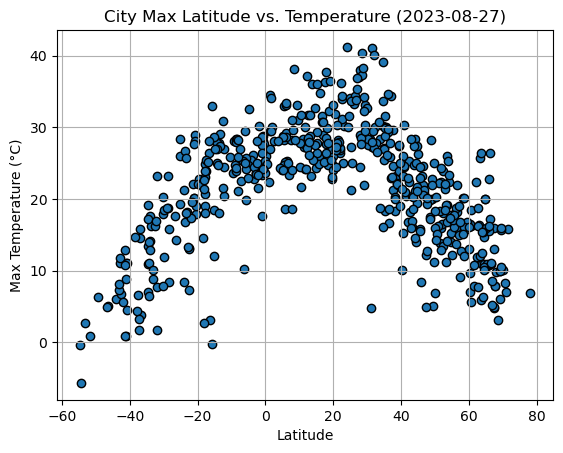

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")# YOUR CODE HERE

# Get the current date
current_date = datetime.now().strftime('%Y-%m-%d')# MY ADDED CODE

# Incorporate the other graph properties
#plt.title("City Max Latitude vs. Temperature (Date)")
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
#plt.ylim(-20, 40)
plt.grid(True)# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
# # Build scatter plot for latitude vs. temperature
# # YOUR CODE HERE

# # Incorporate the other graph properties
# # YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

#### Latitude Vs. Humidity

In [ ]:
# # Build the scatter plots for latitude vs. humidity
# # YOUR CODE HERE

# # Incorporate the other graph properties
# # YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig2.png")

# # Show plot
# plt.show()

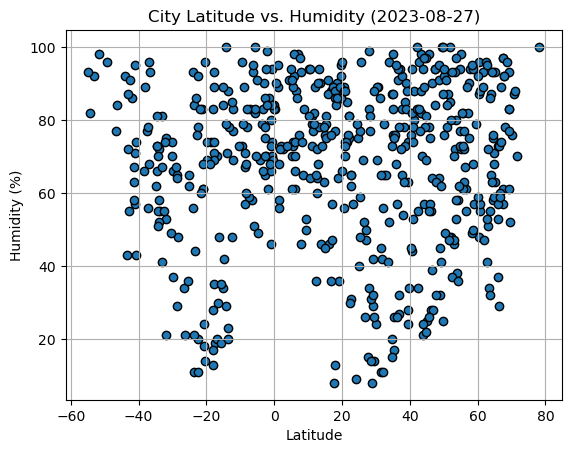

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")# YOUR CODE HERE

# Get the current date
#current_date = datetime.now().strftime('%Y-%m-%d')# MY ADDED CODE

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# # Build the scatter plots for latitude vs. cloudiness
# # YOUR CODE HERE

# # Incorporate the other graph properties
# # YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig3.png")

# # Show plot
# plt.show()

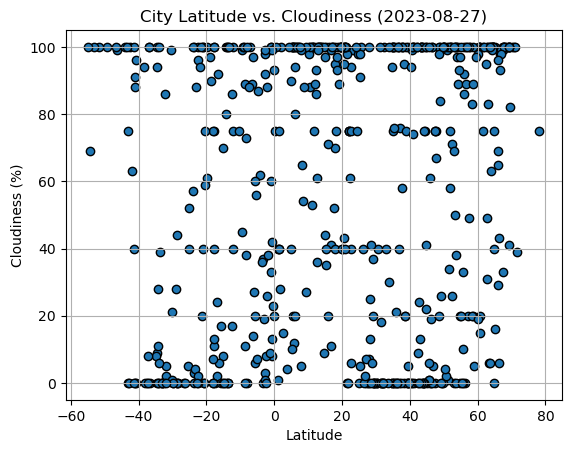

In [10]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")# YOUR CODE HERE

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# # Build the scatter plots for latitude vs. wind speed
# # YOUR CODE HERE

# # Incorporate the other graph properties
# # YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig4.png")

# # Show plot
# plt.show()

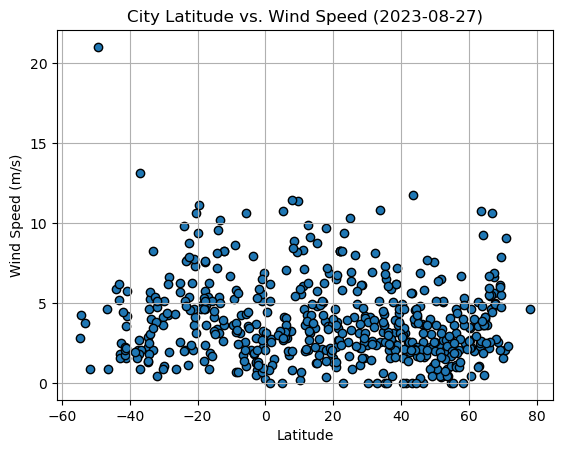

In [11]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")# YOUR CODE HERE

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
#plt.ylim(-0.75, 15.5)
plt.grid(True)# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title_prefix, save_filename):# Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Create the title string with the r-value
    title = f"{title_prefix} (r = {rvalue:.2f})"
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Save the figure
    plt.savefig(save_filename)# YOUR CODE HERE


In [ ]:
# # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# # YOUR CODE HERE

# # Display sample data
# northern_hemi_df.head()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,crane,31.3974,-102.3501,27.21,45,18,2.61,US,1693121063
4,wailua homesteads,22.0669,-159.3780,26.44,81,75,8.23,US,1693121064
5,altai,46.3722,96.2583,20.94,28,19,2.15,MN,1693121065
9,igarka,67.4667,86.5833,15.93,57,33,5.61,RU,1693121066
12,kodiak,57.7900,-152.4072,12.73,94,100,6.69,US,1693121068


In [ ]:
# # Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# # YOUR CODE HERE

# # Display sample data
# southern_hemi_df.head()

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,5.01,84,99,0.89,NZ,1693120791
1,coquimbo,-29.9533,-71.3436,11.85,66,0,1.03,CL,1693121063
2,waitangi,-43.9535,-176.5597,6.01,92,100,5.87,NZ,1693121063
6,grytviken,-54.2811,-36.5092,-5.70,82,69,4.27,GS,1693121065
7,byron bay,-28.6500,153.6167,18.73,65,44,4.25,AU,1693120972


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

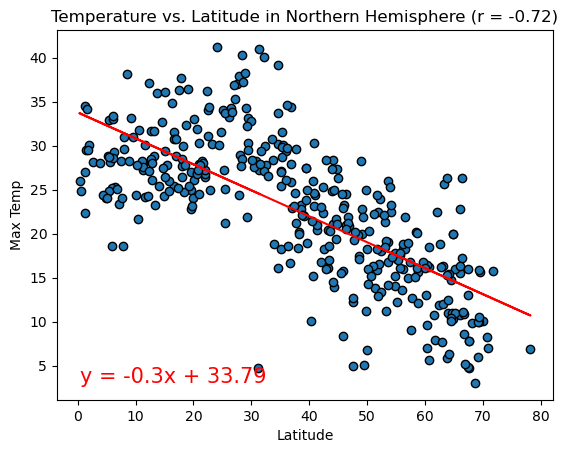

In [15]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temp",
                              "Temperature vs. Latitude in Northern Hemisphere",
                              "output_data/Fig5.png")# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

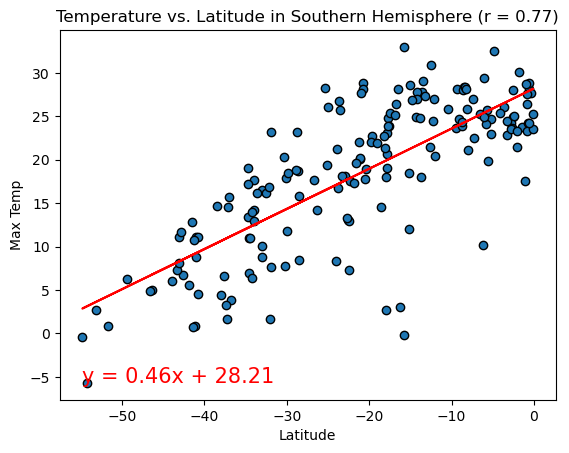

In [16]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                              "Latitude", "Max Temp",
                              "Temperature vs. Latitude in Southern Hemisphere",
                              "output_data/Fig6.png")# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between Temperature and Latitude reveals significant insights about temperature distribution on a global scale. In the Northern Hemisphere, a clear negative linear correlation exists between latitude and maximum temperature. As latitude increases away from the equator, temperatures tend to decrease, resulting in a moderately strong negative correlation (r = -0.72). The linear regression equation, y = -3x + 33.79, indicates a drop of approximately 3 units per degree of latitude. Conversely, the Southern Hemisphere exhibits a positive correlation (r = 0.77), with temperatures rising by about 0.46 units per degree (y = 0.46x + 28.21) as latitude approaches the equator. 

YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

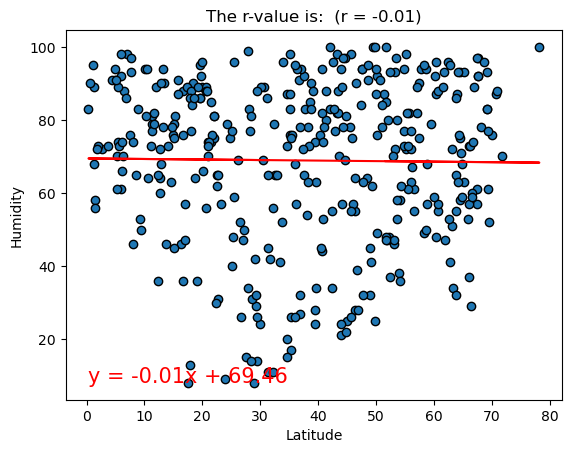

In [17]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                              "Latitude", "Humidity",
                              "The r-value is: ",
                              "output_data/Fig7.png")# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

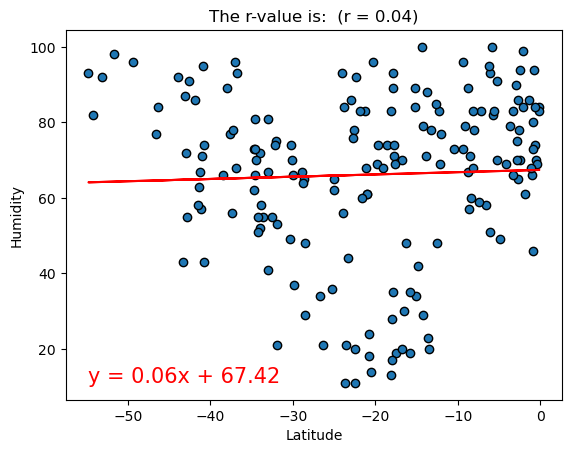

In [18]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                              "Latitude", "Humidity",
                              "The r-value is: ",
                              "output_data/Fig8.png")# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between Humidity and Latitude is explored through a linear regression analysis in both hemispheres. In the Southern Hemisphere, the correlation is weak, with an r-value of 0.04 and a linear equation of y = 0.06x + 67.42. This indicates that humidity's connection to latitude is not pronounced, and other factors likely contribute significantly to humidity levels. Similarly, in the Northern Hemisphere, the linear relationship is weak (r = -0.01) with y = -0.01x + 69.46. The data points are scattered, and the weak correlations emphasize that latitude alone is not a robust predictor of humidity levels. Local conditions, such as geography and climate patterns, are pivotal in determining humidity trends. 
YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

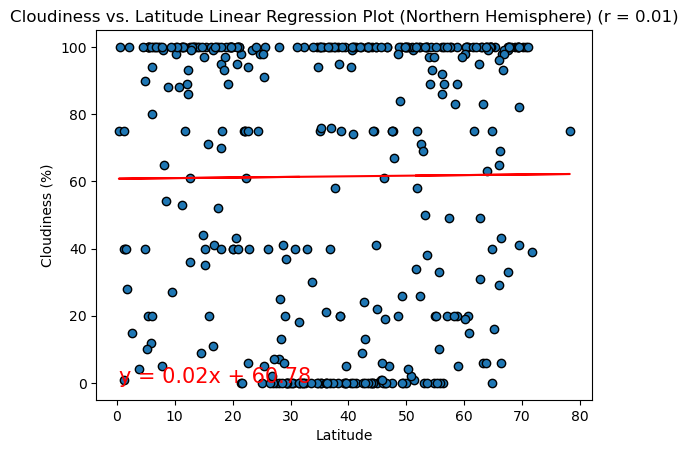

In [19]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness (%)",
                              "Cloudiness vs. Latitude Linear Regression Plot (Northern Hemisphere)",
                              "output_data/Fig9.png")# YOUR CODE HERE


In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

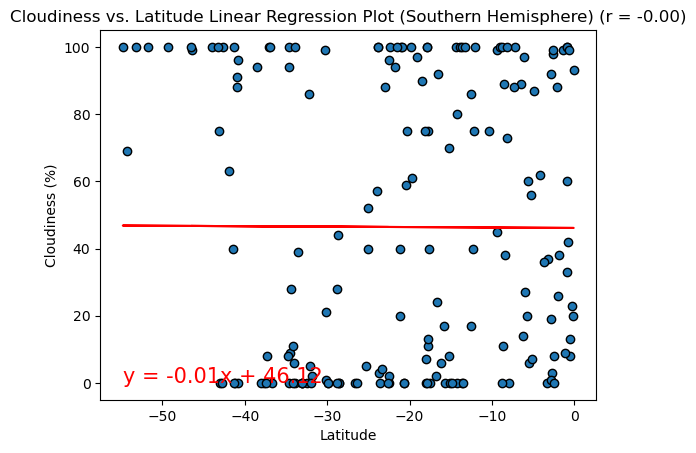

In [20]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness (%)",
                              "Cloudiness vs. Latitude Linear Regression Plot (Southern Hemisphere)",
                              "output_data/Fig10.png")# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between Cloudiness and Latitude is analyzed through linear regression in both the Northern and Southern Hemispheres. In both cases, the r-values are low (0.01 for the Northern Hemisphere and -0.00 for the Southern Hemisphere), indicating that there is no strong linear correlation between latitude and cloudiness. The linear regression equations y = 0.02x + 60.78 for the Northern Hemisphere and y = -0.01x + 46.12 for the Southern Hemisphere reveal minimal slopes and a wide distribution of data points. This dispersion signifies that cloudiness is influenced by intricate atmospheric conditions, such as wind patterns and moisture content, which are not solely dictated by latitude. 
YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

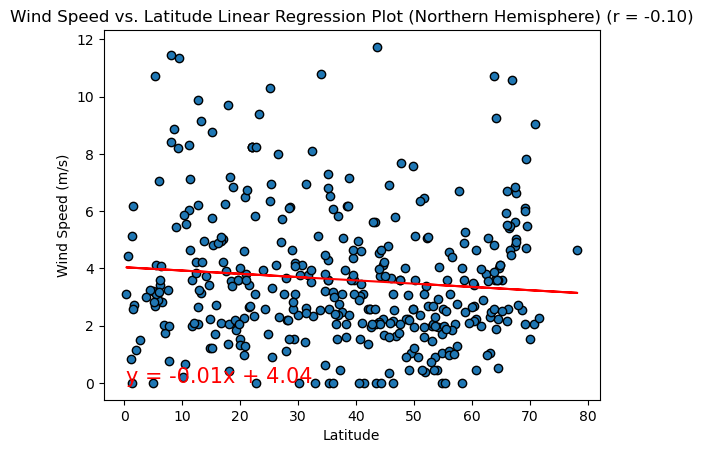

In [21]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed (m/s)",
                              "Wind Speed vs. Latitude Linear Regression Plot (Northern Hemisphere)",
                              "output_data/Fig11.png")# YOUR CODE HERE# YOUR CODE HERE

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE


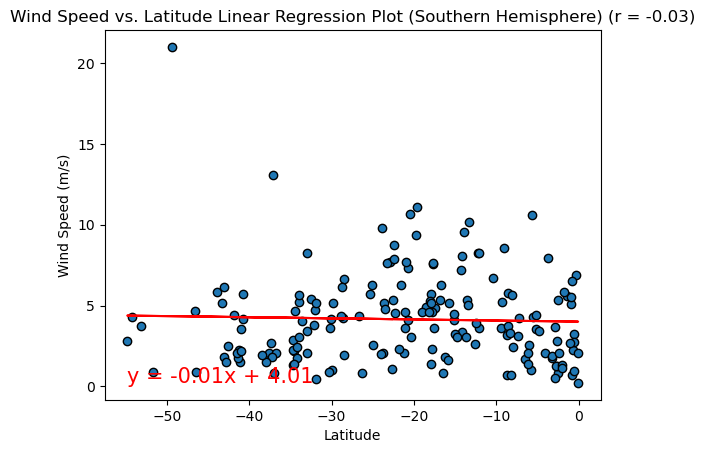

In [22]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed (m/s)",
                              "Wind Speed vs. Latitude Linear Regression Plot (Southern Hemisphere)",
                              "output_data/Fig12.png")# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between Wind Speed and Latitude is examined through linear regression in both the Northern and Southern Hemispheres. In both cases, the r-values are low (-0.10 for the Northern Hemisphere and -0.03 for the Southern Hemisphere), indicating weak correlations between latitude and wind speed. The linear regression equations y = -0.01x + 4.04 for the Northern Hemisphere and y = -0.01x + 4.01 for the Southern Hemisphere show minimal slopes and a wide dispersion of data points. This spread reflects that wind speed is influenced by intricate atmospheric dynamics, such as temperature gradients and pressure differences, which aren't solely linked to latitude. 
    
YOUR RESPONSE HERE